# Assignment 1 - Reddit scrapper

<b>06026122 Data Sciencd for Business</b>

<b>Tanakit Intaniyom</b>

**Please note that data is changing all the time because it's real time update.**  
**The result might vary by the time and date you use this software.**

## Import all nessesary python module for data scraping

In [1]:
import os
import urllib.request
import sys
import csv
import pandas as pd

Next, the pre-setup API key will take a request from here.  
For requesting APIs from Reddit, Python package "PRAW" - The Python Reddit API Wrapper must be used.  
reddit can be access here :  
https://reddit.com/  
PRAW APIs document :  
https://praw.readthedocs.io/en/latest/  
https://praw.readthedocs.io/en/latest/code_overview/models/submission.html  
Youtube video reference :  
https://youtu.be/6Pie-uoDYG4

# # DO NOT STEAL MY ACCOUNT # #

In [2]:
!pip install praw

import praw

reddit = praw.Reddit(user_agent = 'Reddit Scraper',
client_id = '##############', 
client_secret = "###########################",
username = '########', 
password = '########')

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


I'm focusing on subreddit "Animemes" this sub is all about a meme in anime or anything related.  
Access https://reddit.com/r/Animemes  

For PRAW documentation about subreddit :  
https://praw.readthedocs.io/en/latest/code_overview/models/subreddit.html  

I will takeout only the hot and latest 300 posts at the current time.

In [3]:
title = []
commentCount = []
upvote = []
over_18 = []

subreddit = reddit.subreddit('Animemes')
for submission in reddit.subreddit('Animemes').hot(limit=300):
    
    #store a title in list
    title.append(submission.title)
    
    #store a comment in list
    commentCount.append(submission.num_comments)
    
    #store a upvote in list
    upvote.append(submission.ups)
    
    #store an over 18+ content status
    over_18.append(submission.over_18)
    
#print(title)
#print(comment)
#print(upvote)
#print(over_18)

Create directory to store a file. If not exist, create a new one.

In [4]:
import csv

if not os.path.exists("data"):
    os.makedirs("data")


## Now let's store it in CSV file.

In [5]:
combinedList = list(zip(title, commentCount, upvote, over_18))

for i in range(0,250):    
    df = pd.DataFrame(combinedList, columns=["title", "comment", "upvotes", "over_18"])
    
df.to_csv("data/data.csv")

Next, I will read and print CSV file to inspect data to clean it or not.

In [6]:
df = pd.read_csv("data/data.csv", encoding = 'unicode_escape')

There is no data to clean so I will start the data processing now.

# Processing -  A-Z alphabet

Next I will categorize from a to z including special charecter too.  

Process the text first.

In [7]:
alphabet = []

for i in df.title:
    
    #print(i)
    
    for j in i:
        j.strip(" ")
        alphabet.append(j) 
        #print(j, end = "")

print(alphabet)
    

['B', 'a', 'n', '_', 'M', 'e', ',', ' ', 'T', 'h', 'e', ' ', 'V', 'e', 'x', 'e', 'd', ' ', 'G', 'e', 'r', 'm', 'a', 'n', ',', ' ', 'a', 'n', 'd', ' ', 'E', 'v', 'a', 's', 'i', 'o', 'n', 'S', 'n', 'a', 'k', 'e', ' ', 's', 'l', 'e', 'e', 'p', 'i', 'n', 'g', ' ', 't', 'o', 'g', 'e', 't', 'h', 'e', 'r', 'S', 'h', 'a', 'r', 'k', 'T', 'R', 'S', ',', ' ', 'K', 'o', 'y', 'o', 'm', 'i', '_', 'A', 'r', 'a', 'r', 'a', 'r', 'a', 'g', 'i', ',', ' ', 'a', 'n', 'd', ' ', 'a', 'x', 'k', 'm', ' ', 'b', 'e', 'i', 'n', 'g', ' ', 'c', 'u', 't', 'e', 'S', 'o', ' ', 't', 'r', 'u', 'e', 'U', 'p', 'g', 'r', 'a', 'd', 'e', 'd', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 'v', 'i', 'e', 'w', 'i', 'n', 'g', ' ', 'p', 'l', 'e', 'a', 's', 'u', 'r', 'e', ' ', 'o', 'f', ' ', 'a', 'l', 'l', ' ', 'y', '\x92', 'a', 'l', 'l', ' ', 'w', 'e', 'e', 'b', 's', '.', 'T', 'h', 'e', 'y', ' ', 'c', 'a', 'n', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'r', 'e', 's', 'i', 's', 't', 'Y', 'o', 'u', 'r', ' ', 'd', 'a', 'i', 'l', 'y', ' ', '

If alphabet is " " (Spacebar), delete it!

In [8]:
alphabet_filtered = []
for character in alphabet:
    
    if not character == " ":
        alphabet_filtered.append(character)

print(alphabet_filtered) 

['B', 'a', 'n', '_', 'M', 'e', ',', 'T', 'h', 'e', 'V', 'e', 'x', 'e', 'd', 'G', 'e', 'r', 'm', 'a', 'n', ',', 'a', 'n', 'd', 'E', 'v', 'a', 's', 'i', 'o', 'n', 'S', 'n', 'a', 'k', 'e', 's', 'l', 'e', 'e', 'p', 'i', 'n', 'g', 't', 'o', 'g', 'e', 't', 'h', 'e', 'r', 'S', 'h', 'a', 'r', 'k', 'T', 'R', 'S', ',', 'K', 'o', 'y', 'o', 'm', 'i', '_', 'A', 'r', 'a', 'r', 'a', 'r', 'a', 'g', 'i', ',', 'a', 'n', 'd', 'a', 'x', 'k', 'm', 'b', 'e', 'i', 'n', 'g', 'c', 'u', 't', 'e', 'S', 'o', 't', 'r', 'u', 'e', 'U', 'p', 'g', 'r', 'a', 'd', 'e', 'd', 'f', 'o', 'r', 't', 'h', 'e', 'v', 'i', 'e', 'w', 'i', 'n', 'g', 'p', 'l', 'e', 'a', 's', 'u', 'r', 'e', 'o', 'f', 'a', 'l', 'l', 'y', '\x92', 'a', 'l', 'l', 'w', 'e', 'e', 'b', 's', '.', 'T', 'h', 'e', 'y', 'c', 'a', 'n', 'n', 'e', 'v', 'e', 'r', 'r', 'e', 's', 'i', 's', 't', 'Y', 'o', 'u', 'r', 'd', 'a', 'i', 'l', 'y', 'd', 'o', 's', 'e', 'o', 'f', 'm', 'a', 's', 'c', 'o', 't', 'y', 'u', 'r', 'i', 'C', 'r', 'e', 'a', 't', 'i', 'o', 'n', 'o', 'f', '

Convert it to lower English alphabet.

In [9]:
alphabet_lowered = []
for character in alphabet_filtered:
    
    character = character.lower()
    alphabet_lowered.append(character)

print(alphabet_lowered) 

['b', 'a', 'n', '_', 'm', 'e', ',', 't', 'h', 'e', 'v', 'e', 'x', 'e', 'd', 'g', 'e', 'r', 'm', 'a', 'n', ',', 'a', 'n', 'd', 'e', 'v', 'a', 's', 'i', 'o', 'n', 's', 'n', 'a', 'k', 'e', 's', 'l', 'e', 'e', 'p', 'i', 'n', 'g', 't', 'o', 'g', 'e', 't', 'h', 'e', 'r', 's', 'h', 'a', 'r', 'k', 't', 'r', 's', ',', 'k', 'o', 'y', 'o', 'm', 'i', '_', 'a', 'r', 'a', 'r', 'a', 'r', 'a', 'g', 'i', ',', 'a', 'n', 'd', 'a', 'x', 'k', 'm', 'b', 'e', 'i', 'n', 'g', 'c', 'u', 't', 'e', 's', 'o', 't', 'r', 'u', 'e', 'u', 'p', 'g', 'r', 'a', 'd', 'e', 'd', 'f', 'o', 'r', 't', 'h', 'e', 'v', 'i', 'e', 'w', 'i', 'n', 'g', 'p', 'l', 'e', 'a', 's', 'u', 'r', 'e', 'o', 'f', 'a', 'l', 'l', 'y', '\x92', 'a', 'l', 'l', 'w', 'e', 'e', 'b', 's', '.', 't', 'h', 'e', 'y', 'c', 'a', 'n', 'n', 'e', 'v', 'e', 'r', 'r', 'e', 's', 'i', 's', 't', 'y', 'o', 'u', 'r', 'd', 'a', 'i', 'l', 'y', 'd', 'o', 's', 'e', 'o', 'f', 'm', 'a', 's', 'c', 'o', 't', 'y', 'u', 'r', 'i', 'c', 'r', 'e', 'a', 't', 'i', 'o', 'n', 'o', 'f', '

Display all count from alphabet list and sort it.

In [10]:
dictionary = {}
class my_dictionary(dict):  
  
    # __init__ function  
    def __init__(self):  
        self = dict()  
          
    # Function to add key:value  
    def add(self, key, value):  
        self[key] = value
        
# Main Function  
dictionary = my_dictionary() 

import collections
from collections import Counter

counts = Counter(alphabet_lowered)

for i in counts:
    key = i
    value = counts[i]
    dictionary.key = key
    dictionary.value = value
    dictionary.add(dictionary.key, dictionary.value)

#test print output
print(dictionary)

#type check
print(type(dictionary))

#sort a dictionary
sortedDictionary = dict(collections.OrderedDict(sorted(dictionary.items())))

#type check
print(type(sortedDictionary))

#test print output
print(sortedDictionary)

#Declair variable for comparison section
Animemes_dict = sortedDictionary

{'b': 126, 'a': 672, 'n': 446, '_': 3, 'm': 234, 'e': 899, ',': 31, 't': 617, 'h': 340, 'v': 59, 'x': 11, 'd': 235, 'g': 157, 'r': 396, 's': 504, 'i': 501, 'o': 566, 'k': 109, 'l': 301, 'p': 122, 'y': 202, 'c': 203, 'u': 234, 'f': 120, 'w': 140, '\x92': 16, '.': 105, '(': 9, ':': 9, ')': 8, 'z': 17, 'j': 32, '!': 43, '1': 18, '/': 4, '0': 14, '3': 9, 'q': 8, '7': 3, '[': 5, ']': 5, '-': 10, "'": 35, '?': 11, '*': 14, '2': 9, '5': 5, '6': 4, '4': 3, '#': 7, '9': 6, '8': 2, '%': 2, 'ü': 1, '>': 1, '+': 1, '"': 4}
<class '__main__.my_dictionary'>
<class 'dict'>
{'!': 43, '"': 4, '#': 7, '%': 2, "'": 35, '(': 9, ')': 8, '*': 14, '+': 1, ',': 31, '-': 10, '.': 105, '/': 4, '0': 14, '1': 18, '2': 9, '3': 9, '4': 3, '5': 5, '6': 4, '7': 3, '8': 2, '9': 6, ':': 9, '>': 1, '?': 11, '[': 5, ']': 5, '_': 3, 'a': 672, 'b': 126, 'c': 203, 'd': 235, 'e': 899, 'f': 120, 'g': 157, 'h': 340, 'i': 501, 'j': 32, 'k': 109, 'l': 301, 'm': 234, 'n': 446, 'o': 566, 'p': 122, 'q': 8, 'r': 396, 's': 504, 't': 

Convert to DataFrame and transpose it. Then write into new CSV file.

In [11]:
textDataFrame = pd.DataFrame.from_dict([sortedDictionary])

textDataFrame = textDataFrame.transpose()

#write into new CSV file
textDataFrame.to_csv("data/textScrap.csv")

Read textScrap.csv again and index it.

In [12]:
#name a column since it has no name yet.

Animemes_text_df = pd.read_csv("data/textScrap.csv", encoding = 'unicode_escape')

Animemes_text_df.columns = ["Alphabet", "Count"]

#preview
Animemes_text_df.head()

,Alphabet,Count
0,!,43
1,"""",4
2,#,7
3,%,2
4,',35


# Visualization - Text

Let's plot a text count that we scrapped before first.

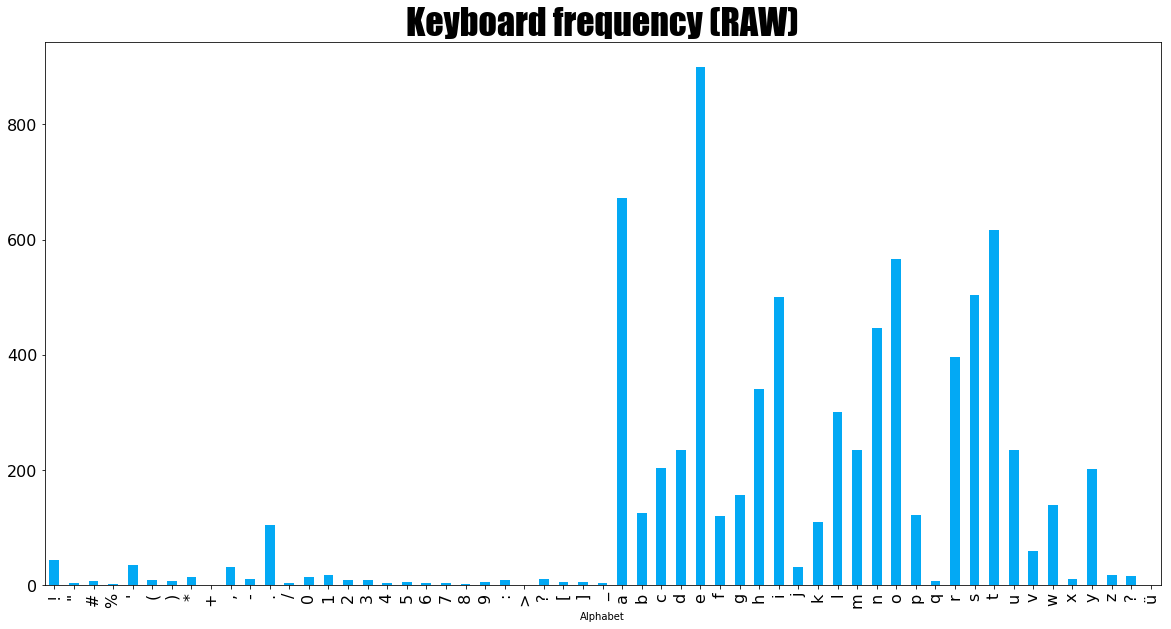

In [13]:
#show plot immediately
%matplotlib inline

#for text decoration
from matplotlib.font_manager import FontProperties

#setting a font style
font = FontProperties()
font.set_family('serif')
font.set_name('Impact')
font.set_style('normal')

#"figsize" is size of the graph
#"color" must be from 0 to 1
#convert tool can be access here :
#http://doc.instantreality.org/tools/color_calculator/

#color #03A9F4 >> Blue >> (0.011, 0.662, 0.956)

Animemes_text_plot = Animemes_text_df.plot(x = "Alphabet", y = "Count", kind = "bar", figsize = (20,10), color = (0.011, 0.662, 0.956),
             fontsize = 16, legend = "")

Animemes_text_plot = Animemes_text_plot.set_title("Keyboard frequency (RAW)", fontweight = 'bold', fontproperties = font, fontsize = 36)

Animemes_text_plot

#Declair variable for comparison section
Animemes_alphabet = Animemes_text_df.Alphabet
Animemes_Count = Animemes_text_df.Count

We can figure out that the alphabet "e" has the most common in this subreddit.

# Visualization - Upvotes and Comment

Now get back to our default dataframe

In [14]:
#preview
df.head()

,Unnamed: 0,title,comment,upvotes,over_18
0,0,"Ban_Me, The Vexed German, and EvasionSnake sle...",5,85,True
1,1,"SharkTRS, Koyomi_Arararagi, and axkm being cute",13,42,True
2,2,So true,47,3180,False
3,3,Upgraded for the viewing pleasure of all yall...,76,6735,False
4,4,They can never resist,22,2934,False


A scatter plot for upvotes to comment for inspect the relation between them.

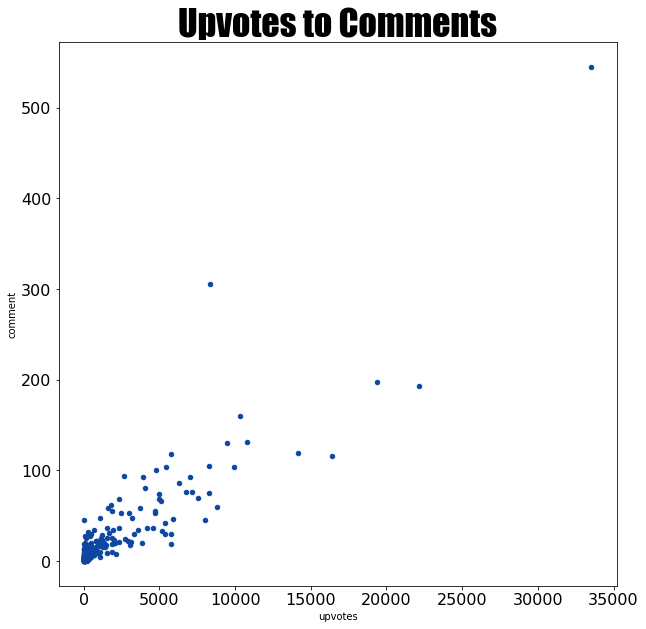

In [15]:
from matplotlib.font_manager import FontProperties

#setting a font style
font = FontProperties()
font.set_family('serif')
font.set_name('Impact')
font.set_style('normal')

Animemes_upvote_plot = df.plot(figsize = (10,10), kind = "scatter", x = "upvotes", y = "comment", 
                        color = (0.050, 0.278, 0.631), fontsize = 16)

#set title
Animemes_upvote_plot= Animemes_upvote_plot.set_title("Upvotes to Comments", fontweight = 'bold', fontproperties = font, fontsize = 36)

Animemes_upvote_plot 

#Declair variable for comparison section
Animemes_upvotes = df.upvotes
Animemes_comment = df.comment

There is somewhat relation between comments and upvotes. The more upvote, the more comment they got.

# Processing - 18+ content (Not safe for work - NSFW)

Inspect the percentage between 18+ content and not 18+ content.

In [16]:
NSFW = pd.read_csv("data/data.csv", encoding = 'unicode_escape', index_col=0)

#preview
NSFW.groupby('over_18').size()

over_18
False    289
True      11
dtype: int64

Display all value in "over_18" column

In [17]:
NSFW = []

for i in df.over_18:
    
    NSFW.append(i)

print(NSFW)

[True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False,

store NSFW dataframe into new CSV file

In [18]:
NSFW_df = pd.DataFrame(NSFW)

NSFW_df.head()

,0
0,True
1,True
2,False
3,False
4,False


In [19]:
NSFW_df.to_csv("data/NSFW.csv")

Load it again and make a new dataframe

In [20]:
#load NSFW file
NSFW_df = pd.read_csv("data/NSFW.csv", index_col = 0)

#name the column
NSFW_df.columns = ["value"]

#make a new NSFW dataframe from dataframe
NSFW_df_count = pd.DataFrame(NSFW_df.value.value_counts().reset_index().values, columns=["Value", "Count"])

NSFW_df_count

,Value,Count
0,False,289
1,True,11


# Visualization -  NSFW! 
with a lot of decoration

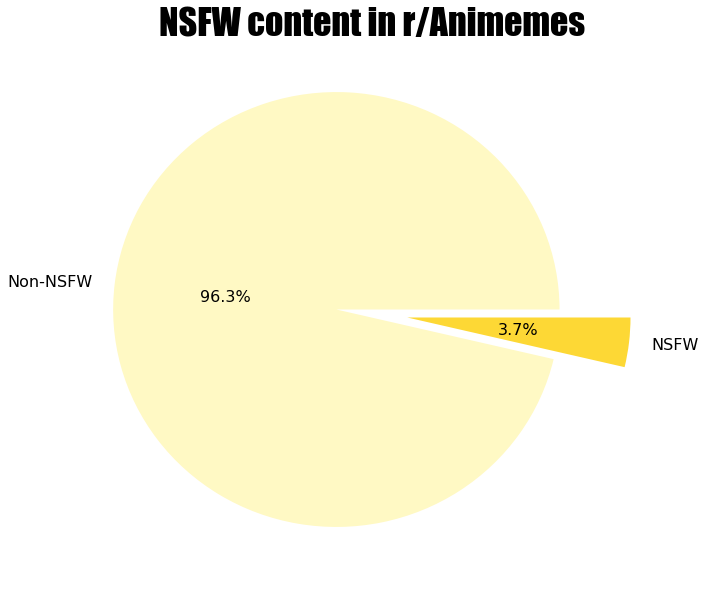

In [21]:
from matplotlib.font_manager import FontProperties

#setting a font style
font = FontProperties()
font.set_family('serif')
font.set_name('Impact')
font.set_style('normal')

#setting option for pic chart
label = ["Non-NSFW", "NSFW"]
color = ["#FFF9C4", "#FDD835"]
explode = (0.16, 0.16)

#Many attribute for decoration

#legend is a short description for chart
#label is a chart name
#y is data
#figsize is a size configuration
#labels "with *S*" is a label for each data
#color is color for each data
#explode is for highlighting
#autopct is for pecentage display
#pctdistance shorts for "pecentage distance"
#startangle is a start point for charting (In this case It's a pie chart)
#fontsize is a font size

NSFW_plot = NSFW_df_count.plot.pie(legend = 0, label = "", y="Count", figsize = (10, 10), labels = label, 
                       colors = color, explode = explode, autopct = "%1.1f%%" , pctdistance = 0.5,
                      startangle = 0, fontsize = 16)

#set title
NSFW_plot.set_title("NSFW content in r/Animemes", fontweight = 'bold', fontproperties = font, fontsize = 36)


# Bonus! Another subreddit (For comparison)

This is bonus content based on my interest.  
This subreddit is r/softwaregore.  
All about a goriness in software.  
**Blue screen INTENSIFIES** 

Access https://www.reddit.com/r/softwaregore/

Takeout : 300 (Same as Animemes)

In [22]:
#this subreddit has no NSFW.

title = []
commentCount = []
upvote = []

subreddit = reddit.subreddit('softwaregore')
for submission in reddit.subreddit('softwaregore').hot(limit=300):
    
    #store a title in list
    title.append(submission.title)
    
    #store a comment in list
    commentCount.append(submission.num_comments)
    
    #store a upvote in list
    upvote.append(submission.ups)
    
#print(title)
#print(comment)
#print(upvote)

Create folder if not exist.

In [23]:
if not os.path.exists("data"):
    os.makedirs("data")

Put them in CSV file.

In [24]:
combinedList = list(zip(title, commentCount, upvote))

for i in range(0,500):    
    df = pd.DataFrame(combinedList, columns=["title", "comment", "upvotes"])
    
df.to_csv("data/softwaregore.csv")

Load them again.

In [25]:
df = pd.read_csv("data/softwaregore.csv", encoding = 'unicode_escape')

Text processing. (Shorten version)

In [26]:
alphabet = []

for i in df.title:
    
    for j in i:
        j.strip(" ")
        alphabet.append(j) 

alphabet_filterd = []

for character in alphabet:
    if not character == " ":
        alphabet_filterd.append(character)

alphabet_lowered = []
for character in alphabet_filterd:
    character = character.lower()
    alphabet_lowered.append(character)

print(alphabet_lowered) 

['p', 's', 'a', ':', 'y', 'o', 'u', 'c', 'a', 'n', 'p', 'o', 's', 't', 'y', 'o', 'u', 'r', 'm', 'i', 'l', 'd', 'o', 'r', 'o', 'v', 'e', 'r', 'p', 'o', 's', 't', 'e', 'd', 'g', 'o', 'r', 'e', 'o', 'v', 'e', 'r', 'i', 'n', 'r', '/', 't', 'e', 'c', 'h', 'n', 'o', 'p', 'e', '!', 'r', 'e', 'm', 'i', 'n', 'd', 'e', 'r', ':', 'w', 'e', 'h', 'a', 'v', 'e', 'a', 'd', 'i', 's', 'c', 'o', 'r', 'd', 'y', 'o', 'u', 'c', 'a', 'n', 'j', 'o', 'i', 'n', 'a', 'n', 'd', 'i', 'n', 't', 'e', 'r', 'a', 'c', 't', 'w', 'i', 't', 'h', 'o', 't', 'h', 'e', 'r', 's', 'w', 'h', 'o', 'l', 'i', 'k', 'e', 't', 'h', 'i', 's', 's', 'u', 'b', 'r', 'e', 'd', 'd', 'i', 't', '!', 'f', 'e', 'a', 't', 'u', 'r', 'i', 'n', 'g', 's', 'p', 'e', 'c', 'i', 'a', 'l', 'r', 'o', 'l', 'e', 's', 'a', 'n', 'd', 'a', 'c', 't', 'i', 'v', 'e', 'm', 'o', 'd', 'e', 'r', 'a', 't', 'o', 'r', 's', '.', 's', 'o', 'm', 'e', 'k', 'i', 'd', 'w', 'a', 's', 'p', 'l', 'a', 'y', 'i', 'n', 'g', 'm', 'i', 'n', 'e', 'c', 'r', 'a', 'f', 't', 'w', 'i', 't',

Well... A lot of text.

Next : Categorize it!

In [27]:
dictionary = {}
class my_dictionary(dict):  
  
    # __init__ function  
    def __init__(self):  
        self = dict()  
          
    # Function to add key:value  
    def add(self, key, value):  
        self[key] = value
        
# Main Function  
dictionary = my_dictionary() 

import collections
from collections import Counter

counts = Counter(alphabet_lowered)

for i in counts:
    key = i
    value = counts[i]
    dictionary.key = key
    dictionary.value = value
    dictionary.add(dictionary.key, dictionary.value)

#test print output
print(dictionary)

#type check
print(type(dictionary))

#sort a dictionary
sortedDictionary = dict(collections.OrderedDict(sorted(dictionary.items())))

#type check
print(type(sortedDictionary))

#test print output
print(sortedDictionary)

#Declair variable for comparison section
SWgore_dict = sortedDictionary

{'p': 230, 's': 655, 'a': 742, ':': 6, 'y': 248, 'o': 784, 'u': 266, 'c': 239, 'n': 618, 't': 874, 'r': 495, 'm': 302, 'i': 717, 'l': 457, 'd': 375, 'v': 108, 'e': 1040, 'g': 228, '/': 2, 'h': 486, '!': 25, 'w': 250, 'j': 28, 'k': 140, 'b': 150, 'f': 148, '.': 167, '\x92': 24, '?': 327, "'": 44, ',': 52, 'x': 13, '1': 17, '6': 3, 'q': 3, '2': 12, '~': 2, '5': 5, '0': 19, '(': 7, ')': 7, '-': 7, '4': 7, '7': 4, '_': 8, '3': 6, 'ã': 2, '¶': 1, '¼': 1, 'z': 7, '"': 10, ';': 1, '9': 4, '8': 4, '+': 1, '*': 6, '{': 2, '}': 2, '\x93': 3, '\x94': 3, '$': 1, 'â': 1, '\x80': 1, '=': 1, ']': 1, '%': 2, '#': 1, '\\': 1, '\x85': 1}
<class '__main__.my_dictionary'>
<class 'dict'>
{'!': 25, '"': 10, '#': 1, '$': 1, '%': 2, "'": 44, '(': 7, ')': 7, '*': 6, '+': 1, ',': 52, '-': 7, '.': 167, '/': 2, '0': 19, '1': 17, '2': 12, '3': 6, '4': 7, '5': 5, '6': 3, '7': 4, '8': 4, '9': 4, ':': 6, ';': 1, '=': 1, '?': 327, '\\': 1, ']': 1, '_': 8, 'a': 742, 'b': 150, 'c': 239, 'd': 375, 'e': 1040, 'f': 148, 'g

After that, put then in CSV file.

In [28]:
textDataFrame = pd.DataFrame.from_dict([sortedDictionary])

textDataFrame = textDataFrame.transpose()

#write into new CSV file
#encoding is "UTF-8"

textDataFrame.to_csv("data/textScrap_softwaregore.csv", encoding = "utf-8")

Read them again.

In [29]:
#name a column since it has no name yet.

SWgore_text_df = pd.read_csv("data/textScrap_softwaregore.csv", encoding = "utf-8")

SWgore_text_df.columns = ["Alphabet", "Count"]

#preview
SWgore_text_df.head()

,Alphabet,Count
0,!,25
1,"""",10
2,#,1
3,$,1
4,%,2


Plot the alphabet frequency for r/softwaregore

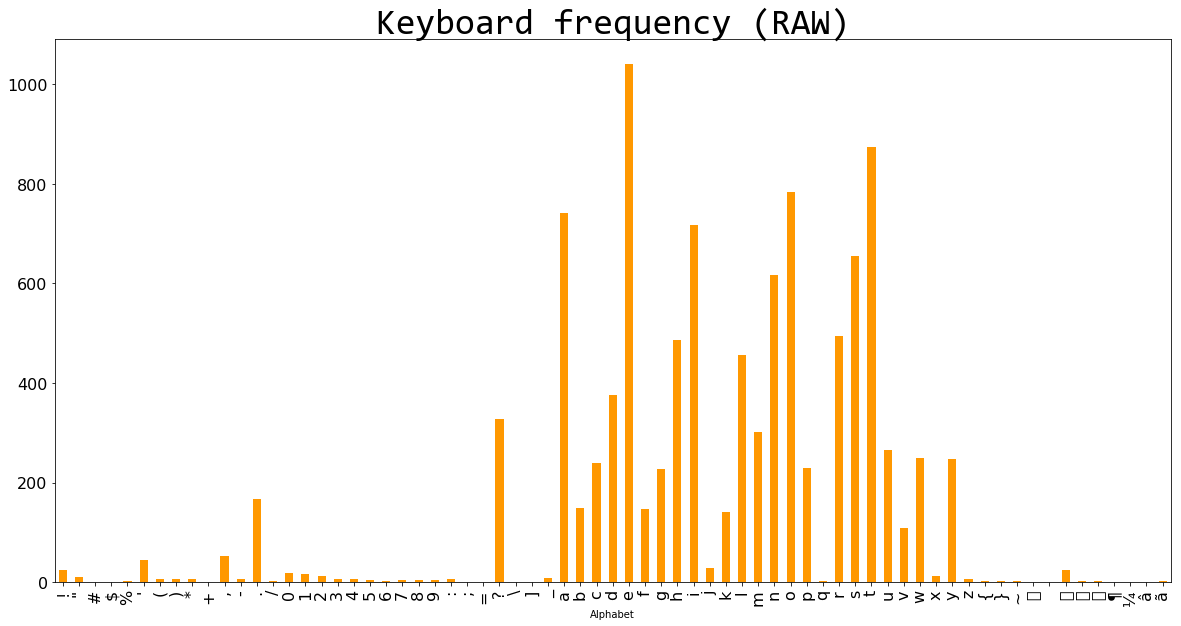

In [30]:
#show plot immediately
%matplotlib inline

#for text decoration
from matplotlib.font_manager import FontProperties

#setting a font style
font = FontProperties()
font.set_family('serif')
font.set_name('Consolas')
font.set_style('normal')

#"figsize" is size of the graph
#"color" must be from 0 to 1
#convert tool can be access here :
#http://doc.instantreality.org/tools/color_calculator/

#(1, 0.596, 0) >> Orange

SWgore_text_plot = SWgore_text_df.plot(x = "Alphabet", y = "Count", kind = "bar", figsize = (20,10), color = (1, 0.596, 0),
             fontsize = 16, legend = "")

SWgore_text_plot = SWgore_text_plot.set_title("Keyboard frequency (RAW)", fontweight = 'bold', fontproperties = font, fontsize = 36)

SWgore_text_plot

#Declair variable for comparison section
SWgore_alphabet = SWgore_text_df.Alphabet
SWgore_Count = SWgore_text_df.Count

A plot for upvotes to comments

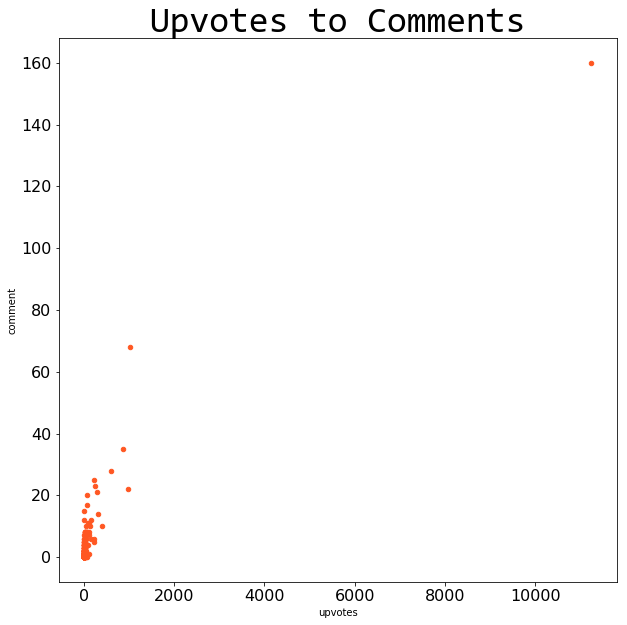

In [31]:
from matplotlib.font_manager import FontProperties

#setting a font style
font = FontProperties()
font.set_family('serif')
font.set_name('Consolas')
font.set_style('normal')

SWgore_upvote_plot = df.plot(figsize = (10,10), kind = "scatter", x = "upvotes", y = "comment", 
                        color = (1, 0.341, 0.133), fontsize = 16)

#set title
SWgore_upvote_plot = SWgore_upvote_plot.set_title("Upvotes to Comments", fontweight = 'bold', fontproperties = font, fontsize = 36)

SWgore_upvote_plot

#Declair variable for comparison section
SWgore_upvotes = df.upvotes
SWgore_comment = df.comment

This is a bit groupy for this subreddit. Small number of posts are famous for a while.

# Final Comparision

Compare 2 subreddit each other.  
## **r/Animemes vs r/softwaregore**

Let's plot a scatter plot for upvotes to comments. First.

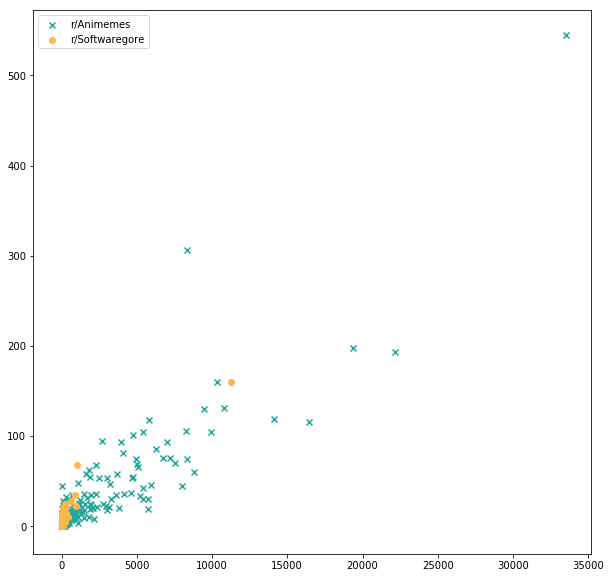

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#show plot immediately
%matplotlib inline

#variable for use

#Animemes_alphabet
#Animemes_Count 
#Animemes_upvotes 
#Animemes_comment 
#SWgore_alphabet 
#SWgore_Count 
#SWgore_upvotes
#SWgore_comment

#----------------------------------------
#upvote is "x"
#comment is "y"

#from previous variable declaration
#ANIMEMES--------
#Animemes_upvotes = df.upvotes
#Animemes_comment = df.comment
#SOFTWAREGORE--------
#SWgore_upvotes = df.upvotes
#SWgore_comment = df.comment

x = Animemes_upvotes
y = Animemes_comment

a = SWgore_upvotes
b = SWgore_comment

plt.figure(figsize=(10,10))
plt.scatter(x, y, c = "#26A69A", marker='x', label='r/Animemes')
plt.scatter(a, b, c = "#FFB74D", marker='o', label='r/Softwaregore')
plt.legend(loc='upper left')

Look! It's a lot of different between 2 subreddit!

Next, last one, is a keyboard frequency comparison bar chart.

## For Animemes

In [33]:
#preview dataframe
Animemes_text_df.head()

,Alphabet,Count
0,!,43
1,"""",4
2,#,7
3,%,2
4,',35


In [34]:
#preview dictionary
Animemes_dict

#filter only A-Z alphabet
Animemes_dict_filtered = {}

for (key, value) in Animemes_dict.items():
    # Check if key match the alphabet condition then put them into new dictionary.

    #if key.isalpha() == True 
    #This condition is also true but it's not filter for only A-Z
    #and we *CAN NOT* use specific filter since the data is real time update.
    
    #LOWER alphabet only (To match a filtered one before)
    if key in ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]:
        Animemes_dict_filtered[key] = value
 
#check and verify
print('Filtered Dictionary : ')

print(Animemes_dict_filtered)

Filtered Dictionary : 
{'a': 672, 'b': 126, 'c': 203, 'd': 235, 'e': 899, 'f': 120, 'g': 157, 'h': 340, 'i': 501, 'j': 32, 'k': 109, 'l': 301, 'm': 234, 'n': 446, 'o': 566, 'p': 122, 'q': 8, 'r': 396, 's': 504, 't': 617, 'u': 234, 'v': 59, 'w': 140, 'x': 11, 'y': 202, 'z': 17}


## For Softwaregore

In [35]:
#preview dataframe
SWgore_text_df.head()

,Alphabet,Count
0,!,25
1,"""",10
2,#,1
3,$,1
4,%,2


In [36]:
#preview dictionary
SWgore_dict

#filter only A-Z alphabet
SWgore_dict_filtered = {}

for (key, value) in SWgore_dict.items():
    # Check if key match the alphabet condition then put them into new dictionary.

    #if key.isalpha() == True 
    #This condition is also true but it's not filter for only A-Z
    #and we *CAN NOT* use specific filter since the data is real time update.
    
    #LOWER alphabet only (To match a filtered one before)
    if key in ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]:
        SWgore_dict_filtered[key] = value
 
#check and verify
print('Filtered Dictionary : ')

print(SWgore_dict_filtered)

Filtered Dictionary : 
{'a': 742, 'b': 150, 'c': 239, 'd': 375, 'e': 1040, 'f': 148, 'g': 228, 'h': 486, 'i': 717, 'j': 28, 'k': 140, 'l': 457, 'm': 302, 'n': 618, 'o': 784, 'p': 230, 'q': 3, 'r': 495, 's': 655, 't': 874, 'u': 266, 'v': 108, 'w': 250, 'x': 13, 'y': 248, 'z': 7}


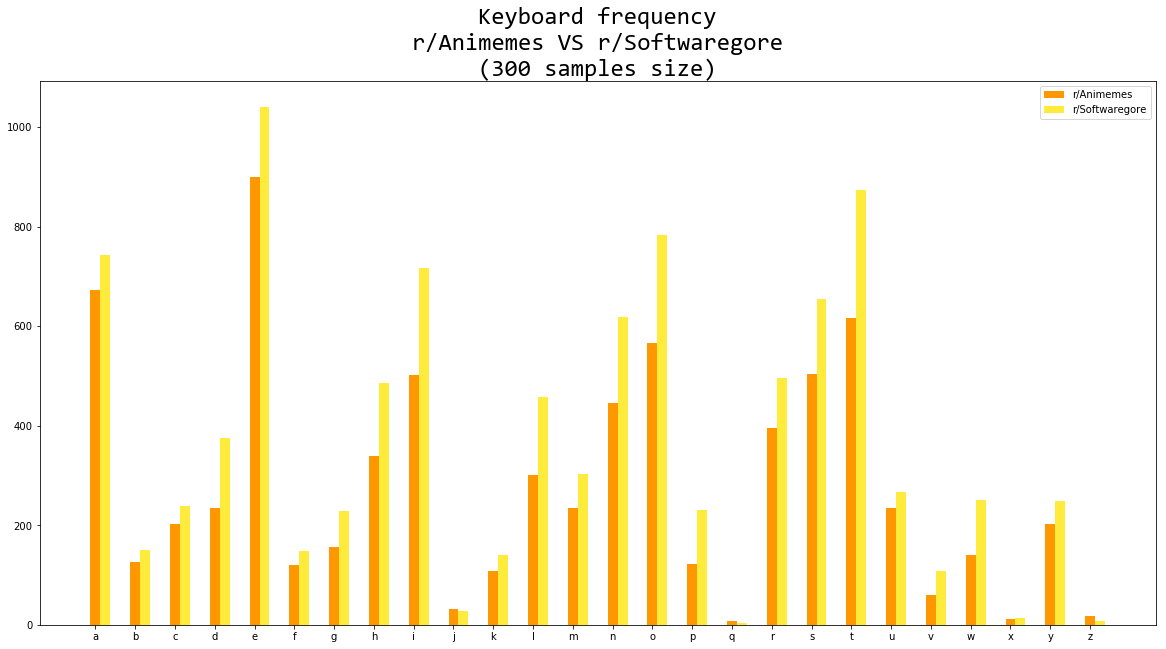

In [37]:
#setting a font style
font = FontProperties()
font.set_family('serif')
font.set_name('Consolas')
font.set_style('normal')

data1 = Animemes_dict_filtered
data2 = SWgore_dict_filtered

plt.figure(figsize=(20,10))

X = np.arange(len(data1))
ax = plt.subplot(111)

ax.bar(X, data1.values(), width=0.25, color = "#FF9800", align='center')
ax.bar(X+0.25, data2.values(), width=0.25, color = "#FFEB3B", align='center')

ax.legend(('r/Animemes','r/Softwaregore'))
plt.xticks(X, data1.keys())

MultiBar = plt.title("Keyboard frequency\nr/Animemes VS r/Softwaregore\n(300 samples size)", fontproperties = font, fontsize = 24)

MultiBar


In [38]:
#End of Assignment